In [23]:
import tensorflow as tf
tf.enable_eager_execution()
from random import randint
from numpy import array
from numpy import argmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [24]:
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

In [25]:
# generate a sequence of random numbers in [0, 99]
def generate_sequence(length=10):
	return [randint(0, 99) for _ in range(length)]


In [26]:
# one hot encode sequence
def one_hot_encode(sequence, n_unique=100):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

In [27]:
# generate data for the lstm
def generate_data():
	# generate sequence
	sequence = generate_sequence()
	# one hot encode
	encoded = one_hot_encode(sequence)
	# convert to 3d for input
	X = encoded.reshape(encoded.shape[0], 1, encoded.shape[1])
	return X, encoded

In [28]:
a = []
b = []
for i in range(1000):
    X,y = generate_data()
    a.append(X)
    b.append(y)

In [29]:
X_train = []
y_train = []
for x in range(750):
    X_train.append(a[i])
    y_train.append(b[i])

X_test = []
y_test = []
for x in range(750,1000):
    X_test.append(a[i])
    y_test.append(b[i])

In [30]:
BATCH_SIZE = 10
BUFFER_SIZE = 20
EVALUATION_INTERVAL = 3
EPOCHS = 1000

In [31]:
train_data_single = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [32]:
data = array([[11, 22],[ 33, 44],[ 55,66]])

# index data
print(data.shape[0])
print(data.shape[-2:])
print(data[-5:])

data = array([
	[0.1, 1.0],
	[0.2, 0.9],
	[0.3, 0.8],
	[0.4, 0.7],
	[0.5, 0.6],
	[0.6, 0.5],
	[0.7, 0.4],
	[0.8, 0.3],
	[0.9, 0.2],
	[1.0, 0.1]])
data = data.reshape(1, 10, 2)
print(data.shape)

3
(3, 2)
[[11 22]
 [33 44]
 [55 66]]
(1, 10, 2)


In [33]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(15, input_shape=(750,10)))
model.add(tf.keras.layers.Dense(750, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
single_step_history = model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=5)

Epoch 1/1000


ValueError: Error when checking input: expected lstm_4_input to have 3 dimensions, but got array with shape (10, 10, 1, 100)

In [21]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()


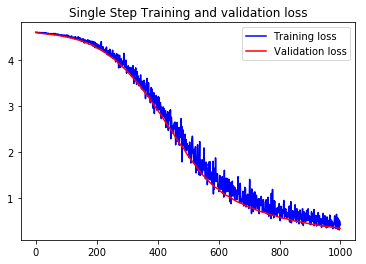

In [24]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')


In [25]:
# evaluate model on new data
X, y = generate_data()
yhat = model.predict(X)
print('Expected:  %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

Expected:  [60, 31, 60, 55, 75, 11, 55, 42, 43, 87, 64, 50, 95, 67, 99, 78, 81, 61, 45, 9, 58, 96, 6, 46, 94, 30, 41, 7, 79, 78, 20, 40, 85, 38, 52, 93, 23, 50, 85, 90, 81, 15, 91, 28, 4, 2, 40, 30, 98, 44, 56, 48, 61, 77, 16, 62, 95, 91, 60, 31, 98, 31, 2, 66, 7, 29, 21, 94, 20, 54, 85, 9, 38, 33, 18, 60, 0, 64, 94, 85, 47, 98, 24, 22, 28, 77, 43, 19, 10, 83, 79, 15, 6, 63, 59, 86, 59, 16, 4, 67, 42, 27, 39, 48, 57, 20, 6, 79, 71, 5, 99, 8, 62, 22, 22, 69, 20, 51, 97, 65, 73, 25, 36, 84, 41, 29, 8, 18, 93, 51, 42, 4, 36, 44, 95, 0, 96, 29, 33, 34, 8, 96, 86, 46, 26, 20, 25, 49, 26, 48, 51, 19, 11, 4, 54, 15, 73, 22, 98, 24, 45, 22, 72, 58, 39, 17, 9, 44, 78, 92, 82, 64, 66, 89, 74, 15, 80, 32, 84, 70, 45, 76, 48, 23, 51, 19, 26, 2, 93, 11, 23, 15, 3, 95, 58, 90, 1, 58, 33, 92, 53, 34, 78, 81, 33, 64, 37, 89, 53, 56, 91, 11, 98, 64, 34, 32, 61, 83, 45, 77, 69, 47, 46, 11, 58, 14, 44, 45, 48, 74, 61, 17, 7, 66, 37, 43, 57, 50, 9, 76, 56, 3, 18, 72, 58, 6, 55, 76, 66, 7, 52, 18, 39, 34, 